In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import random
random.seed(42)
p = 0.10  # 10% of the lines
# keep the header, then take only 1% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped
df = pd.read_csv(
         '/content/gdrive/My Drive/Colab Notebooks/Bayer/PacakgingLineDataSet.csv', encoding = 'unicode_escape',
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p
)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (620,621) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Get the shape and head of the data
print(df.shape)
df.head()

(75960, 670)


,Date_Time,ActivityName,Category,ProductionYN,GRZ_L09_02_Filler_APP_VarPersistent_VC_MD_955_Z_R_CP_BadTubesDisch_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTR_cl_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MD_102_Z_A_CD_ProdNotInserted_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MX_102_MF_ProdNotInsert_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_3__fFlowRate_l_min_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTL_cl_V,...,GRZ_L09_06__Bundler_Application_SpF_HMI_SpF_M_F0_A_FilmEnd_14067_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S17_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S345_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S336_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S347_V,GRZ_L09_08_Palletizer_IDB_IrbPal_St5Prod_V,GRZ_L09_08_Palletizer_Eject_full_V,GRZ_L09_08_Palletizer_IDB_IrbPal_St5Ok_V,GRZ_L09_08_Palletizer_Scan_no_code_V,Generated Date
0,2020-06-08 20:13:59,Undefiniert,2 Unplanned downtime,0,967,0,2934,0,2.17,0,...,0,0,0,0,0,0,1,1,0,2020-06-08 20:13:59
1,2020-06-08 20:14:05,Undefiniert,2 Unplanned downtime,0,967,0,2934,0,2.18,0,...,0,0,0,0,0,0,1,1,0,2020-06-08 20:14:05
2,2020-06-08 20:14:07,Undefiniert,2 Unplanned downtime,0,967,0,2934,0,2.15,0,...,0,0,0,0,0,0,1,1,0,2020-06-08 20:14:07
3,2020-06-08 20:14:10,Undefiniert,2 Unplanned downtime,0,967,0,2934,0,2.14,0,...,0,0,0,0,0,0,1,1,0,2020-06-08 20:14:10
4,2020-06-08 20:14:17,Undefiniert,2 Unplanned downtime,0,967,0,2934,0,2.34,0,...,0,0,0,0,0,0,1,1,0,2020-06-08 20:14:17


In [ ]:
# Iterating the columns
for col in df.columns:
    print(col)

Date_Time
ActivityName
Category
ProductionYN
GRZ_L09_02_Filler_APP_VarPersistent_VC_MD_955_Z_R_CP_BadTubesDisch_V
GRZ_L09_07_Case_Packer_CrtClos_FlapfTR_cl_V
GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MD_102_Z_A_CD_ProdNotInserted_V
GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MX_102_MF_ProdNotInsert_V
GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_3__fFlowRate_l_min_V
GRZ_L09_07_Case_Packer_CrtClos_FlapfTL_cl_V
GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MD_102_Z_R_CD_ProdNotInserted_V
GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_1__fFlowRate_l_min_V
GRZ_L09_04_Cartoner_SX_V3420_00_CollectingChain_VC_MX_3420_MS_ProductCollision_V
GRZ_L09_06__Bundler_Application_SeaF_HMI_SeaF_V_r_PosAct_V
GRZ_L09_06__Bundler_Application_SeaJ_HMI_SeaJ_V_r_SealTempAct_le_V
GRZ_L09_02_Filler_APP_V2200_00_BoxInfeed_VC_MX_2200_T_S_BoxInfeed_V
GRZ_L09_03__Application_Feeding_Application_OPCVariab

In [ ]:
# Get the value count of the Class label
df['ProductionYN'].value_counts()

0    54764
1    21196
Name: ProductionYN, dtype: int64

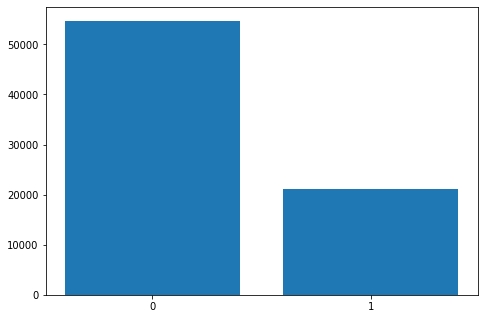

In [ ]:
# Plot the Class label distribution
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['0', '1']
vals = [54764, 21196]
ax.bar(labels,vals)
plt.show()

In [ ]:
# We have 667 PLC tags. So we would like to perform supervised feature selection of PLC Tags wrt Class label ProductionYN. 
# First we will create a dataframe of PLC Tags and class label and check if all the PLC Tags are numeric and deal with the non-numeric

In [ ]:
# Create a dataframe of PLC Tags
N = 666
# Select last N columns of dataframe
currDf = df.iloc[: , -N:]
currDf = currDf.iloc[: , :-1] # Remove the last date column

currDf['ProductionYN'] = df['ProductionYN']

In [ ]:
currDf.head()

,GRZ_L09_02_Filler_APP_VarPersistent_VC_MD_955_Z_R_CP_BadTubesDisch_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTR_cl_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MD_102_Z_A_CD_ProdNotInserted_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MX_102_MF_ProdNotInsert_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_3__fFlowRate_l_min_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTL_cl_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MD_102_Z_R_CD_ProdNotInserted_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_1__fFlowRate_l_min_V,GRZ_L09_04_Cartoner_SX_V3420_00_CollectingChain_VC_MX_3420_MS_ProductCollision_V,GRZ_L09_06__Bundler_Application_SeaF_HMI_SeaF_V_r_PosAct_V,...,GRZ_L09_06__Bundler_Application_SpF_HMI_SpF_M_F0_A_FilmEnd_14067_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S17_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S345_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S336_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S347_V,GRZ_L09_08_Palletizer_IDB_IrbPal_St5Prod_V,GRZ_L09_08_Palletizer_Eject_full_V,GRZ_L09_08_Palletizer_IDB_IrbPal_St5Ok_V,GRZ_L09_08_Palletizer_Scan_no_code_V,ProductionYN
0,967,0,2934,0,2.17,0,86,1.73,0,-29.06,...,0,0,0,0,0,0,1,1,0,0
1,967,0,2934,0,2.18,0,86,1.65,0,-29.06,...,0,0,0,0,0,0,1,1,0,0
2,967,0,2934,0,2.15,0,86,1.68,0,-29.06,...,0,0,0,0,0,0,1,1,0,0
3,967,0,2934,0,2.14,0,86,1.69,0,-29.06,...,0,0,0,0,0,0,1,1,0,0
4,967,0,2934,0,2.34,0,86,1.88,0,-29.06,...,0,0,0,0,0,0,1,1,0,0


In [ ]:
# Checking if the currDf dataframe with PLC Tags have some non-numeric entities
stringType = []
for x in range(0, 666):
  if(currDf.iloc[:, x].dtype == 'object'):
    stringType.append(x)
print(stringType)  

for x in range(0, len(stringType)):
   print(currDf.iloc[:, stringType[x]].unique())

[608, 616, 617, 629, 631, 633, 636, 639, 640, 642, 644]
['GP01Z3U' 'GP01Z3S' 'GP01Z7S' 'GP01ZE8' 'GP01ZHT' 'GP01ZBV']
[2 '2' '1, 4' '1, 2, 3, 4' '4' '2, 3' '1, 3, 4' '1' '1, 2' '2, 3, 4' '3'
 '1, 3' 1 3 '1, 2, 3' '1, 2, 4']
[-2 '-2' '-3, 0' '-3, -2, -1, 0' '0' '-2, -1' '-3, -1, 0' '-3' '-3, -2'
 '-2, -1, 0' '-1' '-3, -1' -3 -1 '-3, -2, -1' '-3, -2, 0']
['11:43:26' '00:00:00' '00:00:02' ... '11:26:58' '11:27:00' '11:27:03']
['04:16:28' '00:00:00' '00:00:07' ... '04:44:01' '04:44:09' '04:44:12']
['26:07:27' '00:00:00' '00:00:02' ... '28:11:48' '28:11:50' '28:11:53']
['10:03:33' '00:00:00' '00:00:03' ... '11:55:25' '11:55:37' '11:55:40']
['00:04:00' '00:00:00' '00:00:01' '00:00:02' '00:00:03' '00:00:04'
 '00:00:05' '00:00:06' '00:00:07' '00:00:08' '00:00:09' '00:00:10'
 '00:00:11' '00:00:12' '00:00:13' '00:00:14' '00:00:15' '00:00:16'
 '00:00:17' '00:00:18' '00:00:19' '00:00:20' '00:00:21' '00:00:22'
 '00:00:23' '00:00:24' '00:00:25' '00:00:26' '00:00:27' '00:00:28'
 '00:00:29' '00:00:30'

In [ ]:
# Only the stringType = [608, 616, 617,  644] seems to have discreate values, so we will consider only these non-numeric columns
# We will first drop the unwanted cols and then use Label Encoder. We need to do a train-test split of the currDf before Label Encoder

In [ ]:
# Remove cols 629, 631, 633, 636, 639, 640, 642
currDf.drop(currDf.columns[[629, 631, 633, 636, 639, 640, 642]], axis = 1, inplace = True)

In [ ]:
print(currDf.shape)
currDf.head()

(75960, 659)


,GRZ_L09_02_Filler_APP_VarPersistent_VC_MD_955_Z_R_CP_BadTubesDisch_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTR_cl_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MD_102_Z_A_CD_ProdNotInserted_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MX_102_MF_ProdNotInsert_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_3__fFlowRate_l_min_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTL_cl_V,GRZ_L09_04_Cartoner_SX_V0102_00_ProductInsertedCompl_VC_MD_102_Z_R_CD_ProdNotInserted_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_1__fFlowRate_l_min_V,GRZ_L09_04_Cartoner_SX_V3420_00_CollectingChain_VC_MX_3420_MS_ProductCollision_V,GRZ_L09_06__Bundler_Application_SeaF_HMI_SeaF_V_r_PosAct_V,...,GRZ_L09_06__Bundler_Application_SpF_HMI_SpF_M_F0_A_FilmEnd_14067_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S17_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S345_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S336_V,GRZ_L09_07_Case_Packer_STâ__RUNG_S347_V,GRZ_L09_08_Palletizer_IDB_IrbPal_St5Prod_V,GRZ_L09_08_Palletizer_Eject_full_V,GRZ_L09_08_Palletizer_IDB_IrbPal_St5Ok_V,GRZ_L09_08_Palletizer_Scan_no_code_V,ProductionYN
0,967,0,2934,0,2.17,0,86,1.73,0,-29.06,...,0,0,0,0,0,0,1,1,0,0
1,967,0,2934,0,2.18,0,86,1.65,0,-29.06,...,0,0,0,0,0,0,1,1,0,0
2,967,0,2934,0,2.15,0,86,1.68,0,-29.06,...,0,0,0,0,0,0,1,1,0,0
3,967,0,2934,0,2.14,0,86,1.69,0,-29.06,...,0,0,0,0,0,0,1,1,0,0
4,967,0,2934,0,2.34,0,86,1.88,0,-29.06,...,0,0,0,0,0,0,1,1,0,0


In [ ]:
# Checking if the currDf dataframe with PLC Tags have some non-numeric entities
stringType = []
for x in range(0, 659):
  if(currDf.iloc[:, x].dtype == 'object'):
    stringType.append(x)
print(stringType)  

for x in range(0, len(stringType)):
   print(currDf.iloc[:, stringType[x]].unique())

[608, 616, 617, 637]
['GP01Z3U' 'GP01Z3S' 'GP01Z7S' 'GP01ZE8' 'GP01ZHT' 'GP01ZBV']
[2 '2' '1, 4' '1, 2, 3, 4' '4' '2, 3' '1, 3, 4' '1' '1, 2' '2, 3, 4' '3'
 '1, 3' 1 3 '1, 2, 3' '1, 2, 4']
[-2 '-2' '-3, 0' '-3, -2, -1, 0' '0' '-2, -1' '-3, -1, 0' '-3' '-3, -2'
 '-2, -1, 0' '-1' '-3, -1' -3 -1 '-3, -2, -1' '-3, -2, 0']
['09_64_00_91' '09_64_00' '09_64_00_01']


In [ ]:
print(currDf.shape)
from sklearn.model_selection import train_test_split

train, test = train_test_split(currDf, test_size=0.25, random_state= 42)

print(train.shape)
print(test.shape)

from sklearn.preprocessing import LabelEncoder
for x in range(0, len(stringType)):
  print(stringType[x])
  le = LabelEncoder()
  train.iloc[:, stringType[x]] = le.fit_transform(train.iloc[:,stringType[x]].astype(str)) 
  test.iloc[:, stringType[x]] = le.transform(test.iloc[:,stringType[x]].astype(str)) 


(75960, 659)
(56970, 659)
(18990, 659)
608
616
617
637


In [ ]:
# Before applying ML algorithms to determine Feature Selection, it is better to do standardization of the features. Let us use a few Feature Selection algo

In [ ]:
# Feature Selection using correlation analysis
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled)
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled)

In [ ]:
cor = train_scaled.corr()
cor_target = abs(cor.iloc[:, 658])  
relevant_features = cor_target[cor_target > 0.5]
relevant_features.index

Int64Index([  4, 102, 109, 110, 114, 123, 131, 133, 137, 138, 150, 151, 152,
            159, 165, 167, 171, 176, 181, 186, 190, 196, 199, 202, 205, 207,
            209, 213, 223, 224, 232, 237, 243, 248, 257, 271, 275, 290, 296,
            297, 299, 304, 321, 352, 369, 371, 374, 379, 413, 417, 420, 429,
            444, 449, 452, 484, 487, 488, 491, 501, 502, 504, 507, 511, 522,
            526, 528, 534, 640, 658],
           dtype='int64')

In [ ]:
# checking the relevancy of these Features using Decision Tree Classifier 

In [ ]:
print(len(relevant_features))
# Last label is the class label itself

X_train = train_scaled.iloc[:, relevant_features.index[:-1]]
y_train=  train_scaled.iloc[:, 658]

X_test = test_scaled.iloc[:, relevant_features.index[:-1]]
y_test=  test_scaled.iloc[:, 658]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

70
(56970, 69)
(18990, 69)
(56970,)
(18990,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

clf_model = DecisionTreeClassifier(criterion="gini", random_state=42)   
clf_model.fit(X_train,y_train)
y_predict = clf_model.predict(X_test)


print(accuracy_score(y_test,y_predict))
print(roc_auc_score(y_test,y_predict))
print(f1_score(y_test,y_predict))

0.9862559241706161
0.9818375622850158
0.9753703878456166


In [ ]:
# Using random Oversampling to make class labels equal 

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

clf_model = DecisionTreeClassifier(criterion="gini", random_state=42)   
clf_model.fit(X_res,y_res)

y_predict = clf_model.predict(X_test)

print(accuracy_score(y_test,y_predict))
print(roc_auc_score(y_test,y_predict))
print(f1_score(y_test,y_predict))

0.9849394418114797
0.9816701247141706
0.9731404958677685


In [ ]:
from pandas.core.common import random_state
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import TomekLinks 

#tl = TomekLinks()
#sm = SMOTE(random_state=42)
smteok = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)

X_res, y_res = smteok.fit_resample(X_train, y_train)
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42)   
clf_model.fit(X_res,y_res)

y_predict = clf_model.predict(X_test)

print(accuracy_score(y_test,y_predict))
print(roc_auc_score(y_test,y_predict))
print(f1_score(y_test,y_predict))

0.9864139020537125
0.9830388106370472
0.9757336343115125


In [ ]:
# The Smote Tomek Sampling method gives better results. So Lets check a few other Feature Selection and evaluate using Decision Tree and Smote Tomek way of Sampling

In [ ]:
# Select K best Feature Selection Algo and lets take top 70 features

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled)
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled)

N = 658
X_train = train_scaled.iloc[:, :N]
y_train=  train_scaled.iloc[:, 658]

X_test = test_scaled.iloc[:, :N]
y_test=  test_scaled.iloc[:, 658]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(56970, 658)
(18990, 658)
(56970,)
(18990,)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

select = SelectKBest(score_func=f_classif, k=69)
z = select.fit_transform(X_train,y_train)
 
print("After selecting best 3 features:", z.shape) 

After selecting best 3 features: (56970, 69)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 18  38  44  47  51  63  64  72  78  81  90  95 322 453 459 531 568 573
 576 591 600 622 631 633 643] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
thisFeat = X_train.columns[select.get_support(indices=True)].tolist()
thisFeat

In [ ]:
X_train = X_train.iloc[:, thisFeat]
X_test = X_test.iloc[:, thisFeat]


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(56970, 69)
(18990, 69)
(56970,)
(18990,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

clf_model = DecisionTreeClassifier(criterion="gini", random_state=42)   
clf_model.fit(X_train,y_train)
y_predict = clf_model.predict(X_test)


print(accuracy_score(y_test,y_predict))
print(roc_auc_score(y_test,y_predict))
print(f1_score(y_test,y_predict))

0.9862559241706161
0.9818375622850158
0.9753703878456166


In [ ]:
# Using random Oversampling to make class labels equal 

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

clf_model = DecisionTreeClassifier(criterion="gini", random_state=42)   
clf_model.fit(X_res,y_res)

y_predict = clf_model.predict(X_test)

print(accuracy_score(y_test,y_predict))
print(roc_auc_score(y_test,y_predict))
print(f1_score(y_test,y_predict))

0.9849394418114797
0.9816701247141706
0.9731404958677685


In [ ]:
from pandas.core.common import random_state
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import TomekLinks 

#tl = TomekLinks()
#sm = SMOTE(random_state=42)
smteok = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)

X_res, y_res = smteok.fit_resample(X_train, y_train)
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42)   
clf_model.fit(X_res,y_res)

y_predict = clf_model.predict(X_test)

print(accuracy_score(y_test,y_predict))
print(roc_auc_score(y_test,y_predict))
print(f1_score(y_test,y_predict))

0.9864139020537125
0.9830388106370472
0.9757336343115125


In [ ]:
# Extra Trees Classifier

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled)
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled)

N = 658
X_train = train_scaled.iloc[:, :N]
y_train=  train_scaled.iloc[:, 658]

X_test = test_scaled.iloc[:, :N]
y_test=  test_scaled.iloc[:, 658]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(56970, 658)
(18990, 658)
(56970,)
(18990,)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index= X_train.columns)

In [ ]:
thisFeat = (feat_importances.nlargest(69).index) 

In [ ]:
thisFeat

[4,
 9,
 100,
 102,
 106,
 109,
 114,
 123,
 133,
 137,
 138,
 139,
 150,
 151,
 159,
 165,
 167,
 171,
 176,
 186,
 190,
 193,
 196,
 199,
 205,
 207,
 209,
 213,
 222,
 223,
 224,
 232,
 237,
 241,
 243,
 257,
 271,
 275,
 290,
 296,
 297,
 299,
 304,
 321,
 349,
 352,
 369,
 371,
 374,
 376,
 379,
 410,
 417,
 429,
 444,
 449,
 452,
 462,
 484,
 488,
 491,
 502,
 504,
 507,
 508,
 522,
 526,
 528,
 640]

In [ ]:
X_train = X_train.iloc[:, thisFeat]
X_test = X_test.iloc[:, thisFeat]


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(56970, 69)
(18990, 69)
(56970,)
(18990,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

clf_model = DecisionTreeClassifier(criterion="gini", random_state=42)   
clf_model.fit(X_train,y_train)
y_predict = clf_model.predict(X_test)


print(accuracy_score(y_test,y_predict))
print(roc_auc_score(y_test,y_predict))
print(f1_score(y_test,y_predict))

0.9896787783043707
0.9867424488323767
0.9815442561205273


In [ ]:
# Using random Oversampling to make class labels equal 

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

clf_model = DecisionTreeClassifier(criterion="gini", random_state=42)   
clf_model.fit(X_res,y_res)

y_predict = clf_model.predict(X_test)

print(accuracy_score(y_test,y_predict))
print(roc_auc_score(y_test,y_predict))
print(f1_score(y_test,y_predict))

0.9903106898367562
0.9874110988195802
0.9826676714393369


In [ ]:
from pandas.core.common import random_state
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import TomekLinks 

#tl = TomekLinks()
#sm = SMOTE(random_state=42)
smteok = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'), random_state=42)

X_res, y_res = smteok.fit_resample(X_train, y_train)
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42)   
clf_model.fit(X_res,y_res)

y_predict = clf_model.predict(X_test)

print(accuracy_score(y_test,y_predict))
print(roc_auc_score(y_test,y_predict))
print(f1_score(y_test,y_predict))

0.9908372827804107
0.9888683448310616
0.983652762119504


In [ ]:
# We find the Feature Selection Subset having highest F1 score 
thisFeat

In [ ]:
N = 658
X_train_name = train.iloc[:, :N]

X_train_name = X_train_name.iloc[:, thisFeat]
X_train_name.head()

,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_3__fFlowRate_l_min_V,GRZ_L09_06__Bundler_Application_SeaF_HMI_SeaF_V_r_PosAct_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tFoCupEdSW_tData_tData_25__fMonDiffMm_V,GRZ_L09_07_Case_Packer_STâ__RUNG_FaultNrFu13_V,GRZ_L09_04_Cartoner_SX_V0803_01_Efficiency_VC_MD_803_Z_A_CT_MachWorkingTime_V,GRZ_L09_07_Case_Packer_STâ__RUNG_FaultNrFu8_V,GRZ_L09_08_Palletizer_IDB_Stat1_Wnd_L_InfStopCyl_AirPrOk_V,GRZ_L09_07_Case_Packer_CrtClos_FlapfTL_op_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tDrvPiPlT1SW_tEject_cLevelBinFaulty_V,GRZ_L09_08_Palletizer_IDB_Stat1_Wnd_L_TurnCylInf_TiAlarm_V,...,GRZ_L09_08_Palletizer_HMPTAKT_V,GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tFdFilCtrlSW_tSen_wSen_V,GRZ_L09_08_Palletizer_MESSZEIT_PROD_V,GRZ_L09_08_Palletizer_EmStON_V,GRZ_L09_07_Case_Packer_HMPTAKT_V,GRZ_L09_04_Cartoner_SX_V0803_01_Efficiency_VC_MD_803_Z_A_CT_ScrapTime_V,GRZ_L09_06__Bundler_Application_Ouf2_HMI_Ouf2_V_r_VelAct_V,GRZ_L09_08_Palletizer_TP27_PROGSTRING_TAKT_MIN_V,GRZ_L09_07_Case_Packer_MESSZEIT_PROD_V,GRZ_L09_04_Cartoner_SX_V0983_00_EnergySaveMode_VC_MX_983_MW_ESMActivated_V
55806,2.08,-15.00,0.13,4,256882486,4,1,1,31,2,...,0,44031,0,1,0,10087899,0.0,0,84800,0
10213,1.93,-15.00,0.27,4,783070834,4,1,1,45,2,...,1,65374,59700,1,1,9947649,20.0,45,78200,0
62113,2.03,-13.09,0.26,4,327162081,4,1,0,1,2,...,1,65535,7600,1,1,10168149,20.0,36,83200,0
46399,2.16,-15.00,0.00,1,159803952,111,0,0,0,30,...,0,0,0,0,0,10041399,0.0,0,0,1
37003,2.16,-15.00,0.00,1,65605336,111,0,0,0,30,...,0,0,0,0,0,10041399,0.0,0,0,1


In [ ]:
selFeat = X_train_name.columns.values.tolist()
selFeat

['GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tGlCoolCirSW_tCoolCir_tCoolCir_3__fFlowRate_l_min_V',
 'GRZ_L09_06__Bundler_Application_SeaF_HMI_SeaF_V_r_PosAct_V',
 'GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tFoCupEdSW_tData_tData_25__fMonDiffMm_V',
 'GRZ_L09_07_Case_Packer_STâ__RUNG_FaultNrFu13_V',
 'GRZ_L09_04_Cartoner_SX_V0803_01_Efficiency_VC_MD_803_Z_A_CT_MachWorkingTime_V',
 'GRZ_L09_07_Case_Packer_STâ__RUNG_FaultNrFu8_V',
 'GRZ_L09_08_Palletizer_IDB_Stat1_Wnd_L_InfStopCyl_AirPrOk_V',
 'GRZ_L09_07_Case_Packer_CrtClos_FlapfTL_op_V',
 'GRZ_L09_01_Blistering_PLC_Modules__Default__Global_PV_tDrvPiPlT1SW_tEject_cLevelBinFaulty_V',
 'GRZ_L09_08_Palletizer_IDB_Stat1_Wnd_L_TurnCylInf_TiAlarm_V',
 'GRZ_L09_07_Case_Packer_STâ__RUNG_FaultNrFu12_V',
 'GRZ_L09_06__Bundler_Application_Mach_HMI_Mach_F_dw_PLC_HMI_ComCheck_V',
 'GRZ_L09_07_Case_Packer_CrtLd_FlapHoMa_op_V',
 'GRZ_L09_08_Palletizer_IDB_Stat1_Wnd_L_InfStopCyl_TiAlarm_V',
 'GRZ_L09_01_Blistering_PLC_Modules__Defa

In [ ]:
# Understanding Causlity with the help of Partial Correlation

In [ ]:
from scipy import stats, linalg
def partial_corr(C):
    """
    Returns the sample linear partial correlation coefficients between pairs of variables in C, controlling 
    for the remaining variables in C.
    Parameters
    ----------
    C : array-like, shape (n, p)
        Array with the different variables. Each column of C is taken as a variable
    Returns
    -------
    P : array-like, shape (p, p)
        P[i, j] contains the partial correlation of C[:, i] and C[:, j] controlling
        for the remaining variables in C.
    """

    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)

            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr

    return P_corr


In [ ]:
# The Correlation between some of the columns
X_train.iloc[:, [1,4,5,6,9]].corr()

,102,114,123,131,138
102,1.000000,0.970296,0.961896,-0.672821,0.998025
114,0.970296,1.000000,0.942969,-0.661364,0.971571
123,0.961896,0.942969,1.000000,-0.629706,0.963622
131,-0.672821,-0.661364,-0.629706,1.000000,-0.671515
138,0.998025,0.971571,0.963622,-0.671515,1.000000


In [ ]:

partial_corr_array = (X_train.iloc[:, [1,4,5,6,9]].values)


# Calculate the partial correlation coefficients
partial_corr(partial_corr_array)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


array([[ 1.00000000e+00,  4.38610454e-02,  7.33899717e-03,
        -3.19376630e-02,  9.47322298e-01],
       [ 4.38610454e-02,  1.00000000e+00,  1.04145676e-01,
         3.44928412e-02,  1.86300396e-01],
       [ 7.33899717e-03,  1.04145676e-01,  1.00000000e+00,
         5.59077871e-02,  1.86352394e-01],
       [-3.19376630e-02,  3.44928412e-02,  5.59077871e-02,
         1.00000000e+00, -9.62061998e-04],
       [ 9.47322298e-01,  1.86300396e-01,  1.86352394e-01,
        -9.62061998e-04,  1.00000000e+00]])

In [ ]:
X_train.iloc[:, [1,5,6]].corr()

,102,123,131
102,1.000000,0.961896,-0.672821
123,0.961896,1.000000,-0.629706
131,-0.672821,-0.629706,1.000000


In [ ]:

partial_corr_array = (X_train.iloc[:, [1,5,6]].values)


# Calculate the partial correlation coefficients
partial_corr(partial_corr_array)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


array([[ 1.        ,  0.96926031, -0.11215345],
       [ 0.96926031,  1.        ,  0.06273493],
       [-0.11215345,  0.06273493,  1.        ]])

In [ ]:
X_train.iloc[:, [1,2,3]].corr()

,102,109,110
102,1.000000,-0.978371,-0.835034
109,-0.978371,1.000000,0.841717
110,-0.835034,0.841717,1.000000


In [ ]:
partial_corr_array = (X_train.iloc[:, [1,2,3]].values)


# Calculate the partial correlation coefficients
partial_corr(partial_corr_array)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


array([[ 1.        , -0.1725691 , -0.02983246],
       [-0.1725691 ,  1.        ,  0.84719195],
       [-0.02983246,  0.84719195,  1.        ]])